In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [8]:
import re
import string

Convert uppercase to lowercase

In [9]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove link

In [11]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [12]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuations

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [15]:
data['tweet'].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

remove numbers

In [18]:
data['tweet'] = data['tweet'].str.replace(r'\d+', '', regex=True)

In [19]:
data['tweet'].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [20]:
%pip install nltk

  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 794.4 kB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.5 MB 794.4 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 835.2 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 929.4 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 995.0 kB/s eta 0:00:00
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import nltk

In [23]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [26]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [28]:
data['tweet'].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [29]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [30]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [31]:
data['tweet'].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [32]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [34]:
from collections import Counter
vocab = Counter()

In [35]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [36]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [37]:
len(vocab)

15949

In [38]:
tokens = [key for key in vocab if vocab[key] > 10]

In [39]:
len(tokens)

1145

In [40]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens,'../static/model/vocabulary.txt')

### Divide dataset

In [41]:
x = data['tweet']
y = data['label']

In [42]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached scipy-1.15.1-cp313-cp313-win_amd64.whl (43.6 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [44]:
x_train.shape

(6336,)

In [45]:
x_test.shape

(1584,)

Vertorization

In [46]:
def vectorizer(ds,vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
        
        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst,dtype=np.float32)
    return vectorized_lst_new

In [47]:
vectorized_x_train = vectorizer(x_train,tokens)

In [48]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [49]:
y_train.value_counts()

label
0    4719
1    1617
Name: count, dtype: int64

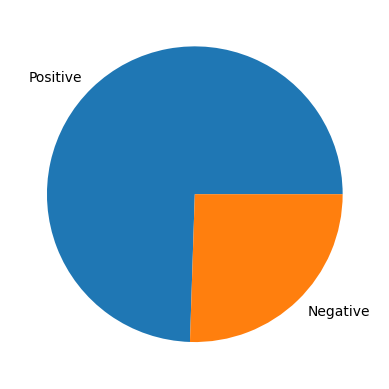

In [50]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()

### Handle imbalanced dataset

In [51]:
%pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9438, 1145) (9438,)


In [53]:
y_train_smote.value_counts()

label
1    4719
0    4719
Name: count, dtype: int64

In [54]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9438, 1145), dtype=float32)

In [55]:
vectorized_x_test = vectorizer(x_test,tokens)

## Model training and evaluation

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def trainig_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [58]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

LogisticRegression()

In [63]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [64]:
y_train_smote

0       1
1       0
2       0
3       0
4       0
       ..
9433    1
9434    1
9435    1
9436    1
9437    1
Name: label, Length: 9438, dtype: int64

In [65]:
y_train_pred

array([1, 0, 0, ..., 1, 1, 1], shape=(9438,))

In [66]:
trainig_scores(y_train_smote,y_train_pred)

Training Scores:
	Accuracy = 0.944
	Precision = 0.923
	Recall = 0.968
	F1-Score = 0.945


In [67]:
y_test_pred =lr.predict(vectorized_x_test)

In [68]:
validation_scores(y_test,y_test_pred)

Testing Scores:
	Accuracy = 0.869
	Precision = 0.703
	Recall = 0.856
	F1-Score = 0.772


### Naive Bayes

In [69]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = mnb.predict(vectorized_x_test)
y_test_pred = mnb.predict(vectorized_x_test)

trainig_scores(y_train_smote,y_train_smote)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.864
	Precision = 0.67
	Recall = 0.929
	F1-Score = 0.779


### Decision Tree

In [70]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = dt.predict(vectorized_x_test)
y_test_pred = dt.predict(vectorized_x_test)

trainig_scores(y_train_smote,y_train_smote)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.822
	Precision = 0.669
	Recall = 0.614
	F1-Score = 0.64


### Random Forest

In [71]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = rf.predict(vectorized_x_test)
y_test_pred = rf.predict(vectorized_x_test)

trainig_scores(y_train_smote,y_train_smote)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.867
	Precision = 0.741
	Recall = 0.748
	F1-Score = 0.745


### Support Vector Machine

In [72]:
svm = MultinomialNB()
svm.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = svm.predict(vectorized_x_test)
y_test_pred = svm.predict(vectorized_x_test)

trainig_scores(y_train_smote,y_train_smote)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.864
	Precision = 0.67
	Recall = 0.929
	F1-Score = 0.779


In [73]:
import pickle
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)